In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, hamming_loss
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

# Import Dataset
path = '/Users/vitthal/Documents/GitHub/marine-enhancement/Data/raw/boat_type_features.csv'


In [11]:
df = pd.read_csv(path)
print(df.shape)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/vitthal/Documents/GitHub/marine-enhancement/Data/raw/boat_type_features.csv'

In [ ]:
print(df.head())
# df.drop(['Unnamed: 0'], axis=1, inplace=True)
# df.drop(['Unnamed: 0.1'], axis=1, inplace=True)
df.drop(['mmsi'], axis=1, inplace=True)
print(df.head())

           mmsi  mean_speed  sd_speed  mean_course   sd_course  mean_dis_port  \
0  1.252340e+12    2.832586  4.649472   182.270427  118.752408   44072.984259   
1  5.145483e+12    1.249238  2.214813   220.598183  104.977158   78241.626524   
2  1.985955e+13    0.744803  2.029596   234.488085   86.170132   21762.805725   
3  3.491170e+13    1.538317  2.506843   146.193885  124.886371   60672.921862   
4  5.110130e+13    2.103552  2.662536   212.084623  101.589559   44856.501803   

   mean_dis_shore  area_covered  log_dis_shore  log_speed  log_dis_port  \
0    31216.217811    158.569940      -4.240884  -7.969092     -1.127925   
1    68632.563233     12.735326      -3.721242  -7.030998      9.336561   
2     2575.576851      0.141141      -9.169449 -10.490752      7.251667   
3    31330.991469      2.075710      -4.446348  -7.687318     10.099510   
4    11129.255970      5.257880      -2.348613  -6.106761      9.691107   

   mul_log_dis_shore_speed  mul_log_dis_port_speed  mul_dis_sh

In [ ]:
# check for missing values in variables

df.isnull().sum()

mean_speed                 0
sd_speed                   0
mean_course                0
sd_course                  0
mean_dis_port              0
mean_dis_shore             0
area_covered               0
log_dis_shore              0
log_speed                  0
log_dis_port               0
mul_log_dis_shore_speed    0
mul_log_dis_port_speed     0
mul_dis_shore_speed        0
unique_id                  0
dtype: int64

In [ ]:
#  Multi Output Classification

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df[['mean_speed', 'sd_speed', 'mean_course', 'sd_course' , 'mean_dis_port' , 'mean_dis_shore', 'area_covered' , 'log_dis_shore', 'log_speed', 'log_dis_port', 'mul_log_dis_shore_speed', 'mul_log_dis_port_speed', 'mul_dis_shore_speed' ]], df['unique_id'], test_size=0.2, random_state=42)

# Reshape y_train and y_test
# print(y_train)
# print(X_train)
# Reshape y_train and y_test
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)


# Train the model
base_classifier = LogisticRegression()
model = ClassifierChain(base_classifier, order='random', random_state=42)
model.fit(X_train, y_train)


ClassifierChain(base_estimator=LogisticRegression(), order='random',
                random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy and hamming loss
accuracy = accuracy_score(y_test, y_pred)
hamming_loss = hamming_loss(y_test, y_pred)

print("Accuracy:", accuracy)
print("Hamming Loss:", hamming_loss)


Accuracy: 0.5434782608695652
Hamming Loss: 0.45652173913043476


In [ ]:
# Training the model using PCA csv
from sklearn.metrics import hamming_loss
# Import Dataset
path = '/Users/vitthal/Documents/GitHub/marine-enhancement/Data/csv/boat_type_pca.csv'

# Read the csv file
df_pca = pd.read_csv(path)

# Training the model
X_train, X_test, y_train, y_test = train_test_split(
    df_pca[['PC1', 'PC2', 'PC3' ]], df_pca['unique_id'], test_size=0.2, random_state=42)

# Reshape y_train and y_test
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Train the model
base_classifier = LogisticRegression()
model = ClassifierChain(base_classifier, order='random', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy and hamming loss
accuracy = accuracy_score(y_test, y_pred)
hamming_loss_value = hamming_loss(y_test, y_pred)

print("Accuracy:", accuracy)
print("Hamming Loss:", hamming_loss_value)


Accuracy: 0.6304347826086957
Hamming Loss: 0.3695652173913043


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the PCA data from the CSV file
df_pca = pd.read_csv('../Data/csv/boat_type_pca.csv')

# Separate the features and the target variable
X = df_pca[['PC1', 'PC2', 'PC3']].values
y = df_pca['unique_id'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

# Initialize the PCA model
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)

# Initialize the SVM classifier
svm = SVC()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm, param_grid, cv=3)
grid_search.fit(X_train_pca, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Transform the test set using PCA
X_test_pca = pca.transform(X_test)

# Predict the labels for the test set using the best model
y_pred = best_model.predict(X_test_pca)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)
print("Best Model Hyperparameters:", best_params)


Best Model Accuracy: 0.6521739130434783
Best Model Hyperparameters: {'C': 10, 'kernel': 'linear'}


Accuracy: 0.6739130434782609
Hamming Loss: 0.32608695652173914


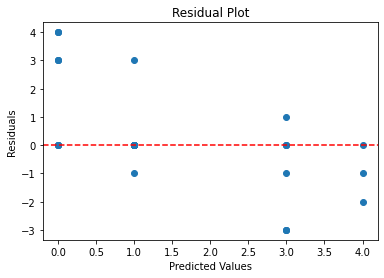

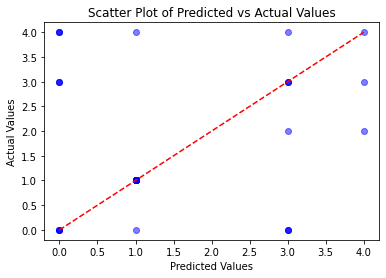

In [ ]:
# Training the model using LDA csv

# Import Dataset
import matplotlib.pyplot as plt
path = '/Users/vitthal/Documents/GitHub/marine-enhancement/Data/csv/boat_type_lda.csv'

# Read the csv file
df_lda = pd.read_csv(path)

# Training the model
X_train, X_test, y_train, y_test = train_test_split(
    df_lda[['LDA1', 'LDA2', 'LDA3' ]], df_lda['unique_id'], test_size=0.2, random_state=42)

# Reshape y_train and y_test
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Train the model
base_classifier = LogisticRegression()
model = ClassifierChain(base_classifier, order='random', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy and hamming loss
accuracy = accuracy_score(y_test, y_pred)
hamming_loss_value = hamming_loss(y_test, y_pred)

print("Accuracy:", accuracy)
print("Hamming Loss:", hamming_loss_value)


residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


# Create a scatter plot of predicted vs actual values
plt.scatter(y_pred, y_test, color='blue', alpha=0.5)
plt.plot([min(y_pred), max(y_pred)], [min(y_test),
         max(y_test)], color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the LDA data from the CSV file
df_lda = pd.read_csv('../Data/csv/boat_type_lda.csv')

# Separate the features and the target variable
X = df_lda[['LDA1', 'LDA2', 'LDA3']].values
y = df_lda['unique_id'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen']
}

# Initialize the LDA model
model = LinearDiscriminantAnalysis()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict the labels for the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)
print("Best Model Hyperparameters:", best_params)


<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Best Model Accuracy: 0.6739130434782609
Best Model Hyperparameters: {'solver': 'lsqr'}


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the ICA data from the CSV file
df_ica = pd.read_csv('../Data/csv/boat_type_ica.csv')

# Separate the features and the target variable
X = df_ica[['ICA1', 'ICA2', 'ICA3']].values
y = df_ica['unique_id'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6956521739130435


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the ICA data from the CSV file
df_ica = pd.read_csv('../Data/csv/boat_type_ica.csv')

# Separate the features and the target variable
X = df_ica[['ICA1', 'ICA2', 'ICA3']].values
y = df_ica['unique_id'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize and train the Support Vector Machines (SVM) model
model = SVC()
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6739130434782609


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the ICA data from the CSV file
df_ica = pd.read_csv('../Data/csv/boat_type_ica.csv')

# Separate the features and the target variable
X = df_ica[['ICA1', 'ICA2', 'ICA3']].values
y = df_ica['unique_id'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6739130434782609


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the ICA data from the CSV file
df_ica = pd.read_csv('../Data/csv/boat_type_ica.csv')

# Separate the features and the target variable
X = df_ica[['ICA1', 'ICA2', 'ICA3']].values
y = df_ica['unique_id'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Initialize the Gradient Boosting model
model = GradientBoostingClassifier()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict the labels for the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)
print("Best Model Hyperparameters:", best_params)


Best Model Accuracy: 0.6956521739130435
Best Model Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


In [ ]:
# Facing issues with the below code, will try to fix it later.
# The main problem with this code is that the library auto-sklearn, is not up to date and therefore it is not working.

import autosklearn.classification as asc
from sklearn.model_selection import train_test_split

path = '/Users/vitthal/Documents/GitHub/marine-enhancement/Data/csv/boat_type_features.csv'

#  Read the csv file

df_stiched = pd.read_csv(path)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_stiched.drop('unique_id', axis=1),
                                                    df_stiched['unique_id'],
                                                    test_size=0.2,
                                                    random_state=42)

# Creating an AutoSklearnClassifier
automl_classifier = asc.AutoSklearnClassifier(time_left_for_this_task=3600,  # Maximum time in seconds for fitting the models
                                              per_run_time_limit=360,  # Maximum time in seconds for a single model
                                              n_jobs=1,  # Number of parallel processes
                                              ensemble_size=4,  # Number of models in the ensemble
                                              ensemble_nbest=4,  # Number of best models to use in the ensemble
                                              seed=42,
                                              memory_limit=8192)  # Random seed for reproducibility

# Training the AutoSklearnClassifier
automl_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = automl_classifier.predict(X_test)

# Evaluating the accuracy
accuracy = (y_pred == y_test).mean()
print("Accuracy:", accuracy)


[ERROR] [2023-05-17 03:03:18,878:Client-AutoML(42):45963bb0-f431-11ed-af79-6e27087b6471] (' Dummy prediction failed with run state StatusType.CRASHED and additional output: {\'error\': \'Result queue is empty\', \'exit_status\': "<class \'pynisher.limit_function_call.AnythingException\'>", \'subprocess_stdout\': \'\', \'subprocess_stderr\': \'Process pynisher function call:\\nTraceback (most recent call last):\\n  File "/Users/vitthal/miniforge3/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap\\n    self.run()\\n  File "/Users/vitthal/miniforge3/lib/python3.10/multiprocessing/process.py", line 108, in run\\n    self._target(*self._args, **self._kwargs)\\n  File "/Users/vitthal/miniforge3/lib/python3.10/site-packages/pynisher/limit_function_call.py", line 108, in subprocess_func\\n    resource.setrlimit(resource.RLIMIT_AS, (mem_in_b, mem_in_b))\\nValueError: current limit exceeds maximum limit\\n\', \'exitcode\': 1, \'configuration_origin\': \'DUMMY\'}.',)
[ERROR] [20

ValueError: (' Dummy prediction failed with run state StatusType.CRASHED and additional output: {\'error\': \'Result queue is empty\', \'exit_status\': "<class \'pynisher.limit_function_call.AnythingException\'>", \'subprocess_stdout\': \'\', \'subprocess_stderr\': \'Process pynisher function call:\\nTraceback (most recent call last):\\n  File "/Users/vitthal/miniforge3/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap\\n    self.run()\\n  File "/Users/vitthal/miniforge3/lib/python3.10/multiprocessing/process.py", line 108, in run\\n    self._target(*self._args, **self._kwargs)\\n  File "/Users/vitthal/miniforge3/lib/python3.10/site-packages/pynisher/limit_function_call.py", line 108, in subprocess_func\\n    resource.setrlimit(resource.RLIMIT_AS, (mem_in_b, mem_in_b))\\nValueError: current limit exceeds maximum limit\\n\', \'exitcode\': 1, \'configuration_origin\': \'DUMMY\'}.',)

In [2]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

# Load the data from CSV files
df_pca = pd.read_csv('../Data/csv/boat_type_pca.csv')
df_lda = pd.read_csv('../Data/csv/boat_type_lda.csv')
df_ica = pd.read_csv('../Data/csv/boat_type_ica.csv')

# Combine the features from all CSV files
X = pd.concat([df_pca[['PC1', 'PC2', 'PC3']], df_lda[['LDA1', 'LDA2', 'LDA3']], df_ica[['ICA1', 'ICA2', 'ICA3']]], axis=1)

# Add the target variable (unique_id)
y = df_pca['unique_id']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the individual models
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()
svm_model = SVC()
j48_model = DecisionTreeClassifier()
# mlp_model = MLPClassifier()
gbc_model = GradientBoostingClassifier()

# Create the ensemble model with the individual models
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('lr', lr_model),
    ('svm', svm_model),
    ('j48', j48_model),
    ('gbc', gbc_model)
], voting='hard')

# ('mlp', mlp_model),

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 5, 10],
    'lr__C': [0.1, 1, 10],
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf'],
    'j48__max_depth': [None, 5, 10],
    'gbc__n_estimators': [100, 200, 300],
    'gbc__learning_rate': [0.1, 0.01, 0.001]
}

# 'mlp__hidden_layer_sizes': [(100,), (200,), (300,)],
# 'mlp__activation': ['relu', 'tanh'],
# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(ensemble_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Make predictions using the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate the accuracy of the best estimator
accuracy = accuracy_score(y_test, y_pred)
print("Best Estimator Accuracy:", accuracy)
print("Best Estimator Parameters:", grid_search.best_params_)


/Users/vitthal/miniforge3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
/Users/vitthal/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vitthal/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of ite

# Random Forrest

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Create a dataframe with the ranking data
data = {
    'Features': ['mean_speed', 'sd_speed', 'mean_course', 'sd_course', 'mean_dis_port', 'mean_dis_shore',
                 'area_covered', 'log_dis_shore', 'log_speed', 'log_dis_port', 'mul_log_dis_shore_speed',
                 'mul_log_dis_port_speed', 'mul_dis_shore_speed'],
    'RFE': [11, 9, 3, 4, 1, 1, 2, 10, 8, 7, 6, 5, 1]
}

df = pd.DataFrame(data)

# Sort the dataframe by RFE score in descending order
df.sort_values('RFE', ascending=True, inplace=True)

print(df)
# Get the top 5 features
top_features = df['Features'].head(6).tolist()

print(top_features)

# Read the feature file into a pandas dataframe
df = pd.read_csv(
    '/Users/vitthal/Documents/GitHub/marine-enhancement/Data/csv/boat_type_features.csv')

# Select the top 5 features and the target variable
features = top_features
target_variable = 'unique_id'

X = df[features]
y = df[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)


                   Features  RFE
4             mean_dis_port    1
5            mean_dis_shore    1
12      mul_dis_shore_speed    1
6              area_covered    2
2               mean_course    3
3                 sd_course    4
11   mul_log_dis_port_speed    5
10  mul_log_dis_shore_speed    6
9              log_dis_port    7
8                 log_speed    8
1                  sd_speed    9
7             log_dis_shore   10
0                mean_speed   11
['mean_dis_port', 'mean_dis_shore', 'mul_dis_shore_speed', 'area_covered', 'mean_course', 'sd_course']
Precision: 0.4517142857142857
Recall: 0.48535196687370596
F1 Score: 0.4646031746031746
Accuracy: 0.717391304347826


/Users/vitthal/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Create a dataframe with the ranking data
data = {
    'Features': ['mean_speed', 'sd_speed', 'mean_course', 'sd_course', 'mean_dis_port', 'mean_dis_shore',
                 'area_covered', 'log_dis_shore', 'log_speed', 'log_dis_port', 'mul_log_dis_shore_speed',
                 'mul_log_dis_port_speed', 'mul_dis_shore_speed'],
    'RFE': [11, 9, 3, 4, 1, 1, 2, 10, 8, 7, 6, 5, 1]
}

df = pd.DataFrame(data)

# Sort the dataframe by RFE score in ascending order
df.sort_values('RFE', ascending=True, inplace=True)

print(df)
# Get the top 5 features
top_features = df['Features'].head(7).tolist()

print(top_features)

# Read the feature file into a pandas dataframe
df = pd.read_csv(
    '/Users/vitthal/Documents/GitHub/marine-enhancement/Data/csv/boat_type_features.csv')

# Select the top 6 features and the target variable
features = top_features
target_variable = 'unique_id'

X = df[features]
y = df[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression classifier
lr_classifier = LogisticRegression()

# Train the classifier on the training data
lr_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)


                   Features  RFE
4             mean_dis_port    1
5            mean_dis_shore    1
12      mul_dis_shore_speed    1
6              area_covered    2
2               mean_course    3
3                 sd_course    4
11   mul_log_dis_port_speed    5
10  mul_log_dis_shore_speed    6
9              log_dis_port    7
8                 log_speed    8
1                  sd_speed    9
7             log_dis_shore   10
0                mean_speed   11
['mean_dis_port', 'mean_dis_shore', 'mul_dis_shore_speed', 'area_covered', 'mean_course', 'sd_course', 'mul_log_dis_port_speed']
Precision: 0.16219512195121952
Recall: 0.23333333333333334
F1 Score: 0.18375
Accuracy: 0.5217391304347826


/Users/vitthal/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vitthal/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import pandas as pd
import numpy as np

# Read the feature file into a pandas dataframe
df = pd.read_csv(
    '/Users/vitthal/Documents/GitHub/marine-enhancement/Data/csv/boat_type_features.csv')

# Select the features and the target variable
features = ['mean_speed', 'sd_speed', 'mean_course', 'sd_course', 'mean_dis_port', 'mean_dis_shore',
            'area_covered', 'log_dis_shore', 'log_speed', 'log_dis_port', 'mul_log_dis_shore_speed',
            'mul_log_dis_port_speed', 'mul_dis_shore_speed']
target_variable = 'unique_id'

X = df[features]
y = df[target_variable]

# Perform feature engineering - polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Create a Logistic Regression classifier
lr_classifier = LogisticRegression()

# Train the classifier on the training data
lr_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)


Precision: 0.40478632478632476
Recall: 0.4151138716356108
F1 Score: 0.40704281712685075
Accuracy: 0.6521739130434783


/Users/vitthal/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vitthal/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
